In [1]:
import sys

sys.path.append('../..')

In [2]:
import torch
from core.models.cnn.decomposed_conv import DecomposedConv2d

def norm_of_model(model):
    norm = 0
    for module in model.modules():
        if isinstance(module, DecomposedConv2d):
            module.compose()
            norm += torch.linalg.vector_norm(module.weight)
        elif isinstance(module, torch.nn.Conv2d):
            norm += torch.linalg.vector_norm(module.weight)
    return norm.item()

In [3]:
from torchvision.models import resnet18

baseline = resnet18(num_classes=21)
baseline.load_state_dict(torch.load('models/test/ResNet18/trained_model.model.sd.pt'))
baseline_norm = norm_of_model(baseline)
print(baseline_norm)

1410.167724609375


In [8]:
import os
import pandas as pd
from core.operation.optimization.svd_tools import load_svd_state_dict

root = 'models/test/'
exps = sorted(os.listdir(root))
svd_norms = {}
for exp in exps:
    if 'SVD' in exp:
        svd_norms[exp] = {}
        decomposing_mode = 'channel' if 'channel' in exp else 'spatial'
        print(exp)
        phases = sorted(os.listdir(os.path.join(root, exp)))[:-1]
        for phase in phases:
            e = float(phase[:-12].split('_')[-1])
            print(phase, e)
            svd_state_dict_path = os.path.join(root, exp, phase)
            svd_model = resnet18(num_classes=21)
            load_svd_state_dict(svd_model, decomposing_mode=decomposing_mode, state_dict_path=svd_state_dict_path)
            svd_norms[exp][e]= norm_of_model(svd_model)
svd_norms = pd.DataFrame(svd_norms)
svd_norms

ResNet18_SVD_channel_O-10.0_H-0.001000
fine-tuning_e_0.1.model.sd.pt 0.1
fine-tuning_e_0.3.model.sd.pt 0.3
fine-tuning_e_0.5.model.sd.pt 0.5
fine-tuning_e_0.7.model.sd.pt 0.7
fine-tuning_e_0.9.model.sd.pt 0.9
fine-tuning_e_0.91.model.sd.pt 0.91
fine-tuning_e_0.92.model.sd.pt 0.92
fine-tuning_e_0.93.model.sd.pt 0.93
fine-tuning_e_0.94.model.sd.pt 0.94
fine-tuning_e_0.95.model.sd.pt 0.95
fine-tuning_e_0.96.model.sd.pt 0.96
fine-tuning_e_0.97.model.sd.pt 0.97
fine-tuning_e_0.98.model.sd.pt 0.98
fine-tuning_e_0.99.model.sd.pt 0.99
fine-tuning_e_0.992.model.sd.pt 0.992
fine-tuning_e_0.994.model.sd.pt 0.994
fine-tuning_e_0.996.model.sd.pt 0.996
fine-tuning_e_0.998.model.sd.pt 0.998
fine-tuning_e_0.999.model.sd.pt 0.999
fine-tuning_e_0.9999.model.sd.pt 0.9999
fine-tuning_e_1.model.sd.pt 1.0
ResNet18_SVD_channel_O-100.0_H-0.001000
fine-tuning_e_0.1.model.sd.pt 0.1
fine-tuning_e_0.3.model.sd.pt 0.3
fine-tuning_e_0.5.model.sd.pt 0.5
fine-tuning_e_0.7.model.sd.pt 0.7
fine-tuning_e_0.9.model.sd.pt

,ResNet18_SVD_channel_O-10.0_H-0.001000,ResNet18_SVD_channel_O-100.0_H-0.001000,ResNet18_SVD_spatial_O-10.0_H-0.001000,ResNet18_SVD_spatial_O-100.0_H-0.001000
0.1000,99.660393,95.062141,95.724365,93.813988
0.3000,146.805893,149.121384,151.478836,152.139679
0.5000,181.789017,189.510193,188.173874,192.710953
0.7000,209.862381,222.863251,218.175583,225.247177
0.9000,233.977356,251.547455,243.565948,253.471283
0.9100,234.983978,253.041412,244.921082,254.778137
0.9200,236.085114,254.283981,245.942642,256.190887
0.9300,237.326263,255.642044,246.923843,257.481995
0.9400,238.364471,256.849213,248.224152,258.712219
0.9500,239.379547,258.238220,249.211624,259.965668


In [15]:
import os
import pandas as pd
from core.operation.optimization.sfp_tools import load_sfp_rsnet_model

root = 'models/test/'
exps = sorted(os.listdir(root))
sfp_norms = {}
for exp in exps:
    if 'SFP' in exp:
        pruning_ratio = float(exp[15:])
        print(exp, pruning_ratio)
        sfp_norms[exp] = {}
        phases = sorted(os.listdir(os.path.join(root, exp)))[:-1]
        for phase in phases:
            print(phase)
            sfp_state_dict_path = os.path.join(root, exp, phase)
            sfp_model = load_sfp_rsnet_model('ResNet18', num_classes=21, state_dict_path=sfp_state_dict_path, pruning_ratio=pruning_ratio)
            sfp_norms[exp][phase] = norm_of_model(sfp_model)
sfp_norms = pd.DataFrame(sfp_norms)
sfp_norms

ResNet18_SFP_P-0.50 0.5
fine-tuning.model.sd.pt
ResNet18_SFP_P-0.70 0.7
fine-tuning.model.sd.pt
ResNet18_SFP_P-0.80 0.8
fine-tuning.model.sd.pt
ResNet18_SFP_P-0.90 0.9
fine-tuning.model.sd.pt


,ResNet18_SFP_P-0.50,ResNet18_SFP_P-0.70,ResNet18_SFP_P-0.80,ResNet18_SFP_P-0.90
fine-tuning.model.sd.pt,976.342651,689.634827,522.255859,326.666138


In [16]:
p_svd_norms = svd_norms / baseline_norm * 100
p_svd_norms

,ResNet18_SVD_channel_O-10.0_H-0.001000,ResNet18_SVD_channel_O-100.0_H-0.001000,ResNet18_SVD_spatial_O-10.0_H-0.001000,ResNet18_SVD_spatial_O-100.0_H-0.001000
0.1000,7.067272,6.741194,6.788155,6.652683
0.3000,10.410527,10.574727,10.741902,10.788765
0.5000,12.891305,13.438841,13.344077,13.665818
0.7000,14.882087,15.804024,15.471605,15.973077
0.9000,16.592165,17.838123,17.272126,17.974549
0.9100,16.663548,17.944065,17.368223,18.067222
0.9200,16.741634,18.032180,17.440666,18.167405
0.9300,16.829648,18.128485,17.510246,18.258962
0.9400,16.903271,18.214090,17.602456,18.346202
0.9500,16.975254,18.312589,17.672481,18.435088


In [18]:
import pandas as pd
from visualization_utils import parse_experiment_folder

train_scores, svd_scores_finetuned, svd_scores_pruned, sfp_scores = parse_experiment_folder('runs/test')


In [19]:
results = pd.DataFrame([train_scores['val/f1'].max(axis=0),
                        train_scores['val/accuracy'].max(axis=0),
                        train_scores['train/accuracy'].max(axis=0)],
                       index=['F1', 'Validation accuracy', 'Train accuracy']
                       ).T.sort_values('F1', ascending=False)

baseline_f1 = results.loc['ResNet18', 'F1']
baseline_size =  sfp_scores['size'].loc['default_scores'].max()

svd_scores_pruned['d_f1'] = (svd_scores_pruned['pruning/f1'] - baseline_f1) / baseline_f1 * 100
svd_scores_pruned['p_size'] = svd_scores_pruned['pruning/size'] / baseline_size * 100
svd_scores_finetuned['d_f1'] = (svd_scores_finetuned['pruning/f1'] - baseline_f1) / baseline_f1 * 100
svd_scores_finetuned['p_size'] = svd_scores_finetuned['pruning/size'] / baseline_size * 100
sfp_scores['d_f1'] = (sfp_scores['f1'] - baseline_f1) / baseline_f1 * 100
sfp_scores['p_size'] = sfp_scores['size'] / baseline_size * 100

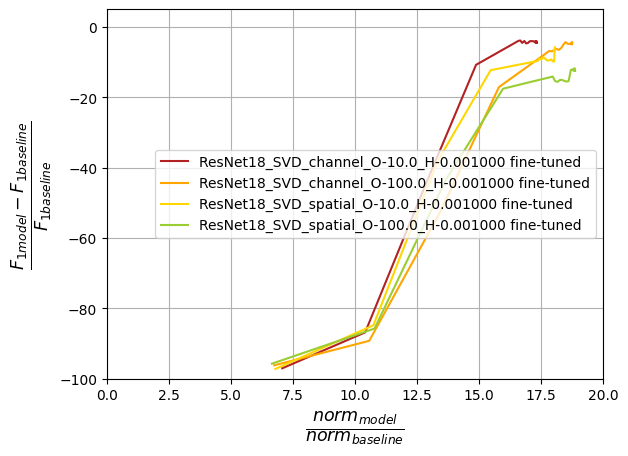

In [21]:
from matplotlib import pyplot as plt
from visualization_utils import plot_scores

plot_scores(
    svd_scores_finetuned=(p_svd_norms, svd_scores_finetuned['d_f1'])
)
plt.xlabel('$\\frac{norm_{model} }{norm_{baseline}}$', fontsize=18)
plt.ylabel('$\\frac{F_{1 model} - F_{1 baseline}}{F_{1 baseline}}$', fontsize=18)
plt.xlim((0, 20))
plt.ylim((-100, 5));